# 🎈 Hello!



Hope you are doing great!



In this workshop you will be familar with the basic concepts of a Convolutional Neural Network (CNN), and will learn how to implement CNNs with PyTorch.

First, we will dive in a solved example. Then, we expect you to be able to solve two challenge questions.

# 🌌 Convolutional Neural Networks Basic Concepts:





* **Convolution Operations**: Explain kernels, strides, padding, and how these elements affect feature extraction.

* **Pooling**: Cover max pooling and average pooling to explain how they reduce spatial dimensions while retaining essential features.

* **Activation Functions**: Discuss ReLU and other common functions like Sigmoid or Tanh.

* **Flattening and Fully Connected Layers**: Explain how convolutional feature maps are converted into vectors for classification.

* **Softmax and Cross-Entropy**: These should be explained in the context of multi-class classification.



🧷 Please check the below websites for information about the mentioned topics, and read them carefully!

- https://www.ibm.com/topics/convolutional-neural-networks

- https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939






# 🛹 Let's go through a solved example!

In this part the [TinyImageNet](https://paperswithcode.com/dataset/tiny-imagenet) dataset will be used.

This is just one example to use PyTorch library for applying ResNet152. You might search for more examples across the web.

## Importing Libraries and Modules

In [1]:
# Import dependencies

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import time

import torch

from torch import optim, nn

from torch.utils.data import DataLoader, TensorDataset, Dataset

import torchvision

import torch.nn as nn

import torch.nn.functional as F

import torch.optim as optim

from torchvision.utils import make_grid

from torchvision import models, datasets

from torchvision import transforms



import os

from random import randint

import urllib

import zipfile



use_cuda = torch.cuda.is_available()

if torch.cuda.is_available():

    print('CUDA is available. Working on GPU')

    DEVICE = torch.device('cuda')

else:

    print('CUDA is not available. Working on CPU')

    DEVICE = torch.device('cpu')

CUDA is available. Working on GPU


## Simple CNN Architecture

In [ ]:
# Define the CNN architecture

class SimpleCNN(nn.Module):

    def __init__(self):

        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5)

        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(6, 16, 5)

        self.fc1 = nn.Linear(16 * 5 * 5, 120)

        self.fc2 = nn.Linear(120, 84)

        self.fc3 = nn.Linear(84, 10)



    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))

        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(-1, 16 * 5 * 5)

        x = F.relu(self.fc1(x))

        x = F.relu(self.fc2(x))

        x = self.fc3(x)

        return x

In [2]:
# Load and preprocess the CIFAR-10 dataset

transform = transforms.Compose(

    [transforms.ToTensor(),

     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])



trainset = torchvision.datasets.CIFAR10(root='./data', train=True,

                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,

                                          shuffle=True, num_workers=2)



testset = torchvision.datasets.CIFAR10(root='./data', train=False,

                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,

                                         shuffle=False, num_workers=2)

100%|██████████| 170498071/170498071 [00:03<00:00, 46815918.63it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# Initialize the network, loss function, and optimizer

net = SimpleCNN().to(DEVICE)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Lists to store loss and accuracy

train_losses = []

val_losses = []

train_accuracies = []

val_accuracies = []



# Training loop

for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0

    correct = 0

    total = 0



    # Training phase

    net.train()

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

        optimizer.zero_grad()

        outputs = net(inputs)

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)

        correct += (predicted == labels).sum().item()



    train_losses.append(running_loss / len(trainloader))

    train_accuracies.append(100 * correct / total)



    # Validation phase

    net.eval()

    val_loss = 0.0

    correct = 0

    total = 0

    with torch.no_grad():

        for data in testloader:

            images, labels = data

            images, labels = images.to(DEVICE), labels.to(DEVICE)

            outputs = net(images)

            loss = criterion(outputs, labels)

            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)

            correct += (predicted == labels).sum().item()



    val_losses.append(val_loss / len(testloader))

    val_accuracies.append(100 * correct / total)



    print(f'Epoch {epoch + 1}, Train Loss: {train_losses[-1]:.3f}, Val Loss: {val_losses[-1]:.3f}, Train Acc: {train_accuracies[-1]:.2f}%, Val Acc: {val_accuracies[-1]:.2f}%')



print('Finished Training')

Epoch 1, Train Loss: 1.748, Val Loss: 1.434, Train Acc: 34.92%, Val Acc: 47.50%
Epoch 2, Train Loss: 1.387, Val Loss: 1.299, Train Acc: 49.81%, Val Acc: 53.65%
Epoch 3, Train Loss: 1.251, Val Loss: 1.195, Train Acc: 55.18%, Val Acc: 57.41%
Epoch 4, Train Loss: 1.157, Val Loss: 1.212, Train Acc: 58.77%, Val Acc: 57.66%
Epoch 5, Train Loss: 1.087, Val Loss: 1.151, Train Acc: 61.55%, Val Acc: 59.74%
Epoch 6, Train Loss: 1.028, Val Loss: 1.132, Train Acc: 63.74%, Val Acc: 60.22%
Epoch 7, Train Loss: 0.977, Val Loss: 1.108, Train Acc: 65.50%, Val Acc: 61.84%
Epoch 8, Train Loss: 0.938, Val Loss: 1.120, Train Acc: 66.91%, Val Acc: 62.33%
Epoch 9, Train Loss: 0.911, Val Loss: 1.220, Train Acc: 67.74%, Val Acc: 60.37%
Epoch 10, Train Loss: 0.876, Val Loss: 1.118, Train Acc: 69.12%, Val Acc: 62.73%
Epoch 11, Train Loss: 0.849, Val Loss: 1.177, Train Acc: 70.07%, Val Acc: 61.37%
Epoch 12, Train Loss: 0.827, Val Loss: 1.193, Train Acc: 70.67%, Val Acc: 61.77%
Epoch 13, Train Loss: 0.810, Val Loss

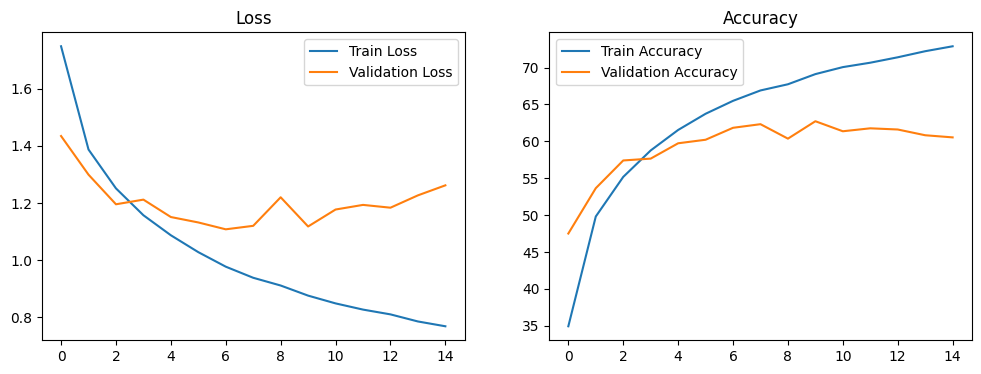

Accuracy of the network on the 10000 test images: 60.54 %


In [ ]:
# Plotting loss and accuracy

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)

plt.plot(train_losses, label='Train Loss')

plt.plot(val_losses, label='Validation Loss')

plt.legend()

plt.title('Loss')



plt.subplot(1, 2, 2)

plt.plot(train_accuracies, label='Train Accuracy')

plt.plot(val_accuracies, label='Validation Accuracy')

plt.legend()

plt.title('Accuracy')



plt.show()



# Evaluate the model on the test set

correct = 0

total = 0

with torch.no_grad():

    for data in testloader:

        images, labels = data

        images, labels = images.to(DEVICE), labels.to(DEVICE)

        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)

        correct += (predicted == labels).sum().item()



print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

# Exploration of Optimizers

## Introduction to Optimizers in Deep Learning



# What is an Optimizer?



An optimizer in deep learning is a key component that adjusts a neural network’s parameters (like weights and biases) to minimize the error, or loss function, of the model. The goal of optimization is to improve the model's performance by efficiently finding the parameter values that lead to the best predictions.



# Types of Optimizers in Deep Learning



Optimizers are specialized algorithms designed to iteratively update and refine model parameters throughout training, based on the feedback from data. Some well-known optimizers include:





* Stochastic Gradient Descent (SGD): Uses random samples for updates, making it computationally efficient.

* Adam: Combines elements of momentum and adaptive learning rates, making it suitable for various tasks.

* RMSprop: Maintains a moving average of squared gradients to stabilize learning, especially for non-stationary objectives.



Each optimizer has unique update rules, learning rates, and momentum strategies aimed at achieving faster and more stable convergence to optimal parameters, thus enhancing model accuracy and reliability.

Optimizers are algorithms that significantly impact the performance, accuracy, and training speed of a deep learning model. These methods adjust the parameters of a neural network, such as weights and learning rates, during training to minimize the loss function. This process is essential as deep learning models can contain millions of parameters, making efficient optimization crucial.



## Selecting an Optimizer

Choosing the right optimizer is essential since it determines how effectively the model converges towards optimal weights. While beginners might consider testing various optimizers, this approach becomes impractical when working with large datasets, as even one training pass (epoch) can take substantial time. Thus, selecting an appropriate optimizer based on the model and application requirements is crucial.



**Popular Deep Learning Optimizers**  

This guide covers a range of optimizers, including:

- **Gradient Descent (GD)**

- **Stochastic Gradient Descent (SGD)**

- **SGD with Momentum**

- **Mini-Batch Gradient Descent**

- **Adagrad**

- **RMSprop**

- **AdaDelta**

- **Adam**



Each optimizer uses different strategies for updating parameters, affecting both the speed and stability of training. By the end of this section, you’ll understand the strengths and mechanisms of each optimizer to make an informed choice for your models.



---



## Key Terms to Know



- **Epoch**: One full pass of the algorithm over the entire training dataset.

- **Sample**: A single data instance in the dataset.

- **Batch**: The subset of samples used to update model parameters in one step.

- **Learning Rate**: A factor determining the step size for updating weights.

- **Cost/Loss Function**: Measures the difference between predicted and actual values, guiding optimization.

- **Weights/Bias**: Trainable parameters in the model that influence signal transmission between neurons.


**Now let’s explore each optimizer.**


### 1. Gradient Descent



Gradient Descent is an optimization algorithm that iteratively adjusts model parameters to minimize the loss function, which improves model accuracy. The process is often compared to rolling a ball down the side of a bowl:





> **it moves in the steepest downward direction, stopping at the lowest point, or the local minimum.**







**Gradient Descent Formula**



The formula for updating parameters in Gradient Descent is:



$$

θ = θ - α⋅∇_θJ(θ)

$$



- **$θ$** : Model parameters (e.g., weights)

- **$α$** : Learning rate (step size)

- **$∇_θJ(θ)$** : Gradient of the loss function $J(θ)$ with respect to $θ$



The formula shows that each parameter $θ$ is updated by moving in the opposite direction of the gradient, scaled by the learning rate $α$.



---



**How Gradient Descent Works**  

1. **Initialize Coefficients**: Start with initial values for parameters (weights).

2. **Evaluate Cost**: Calculate the loss or cost function $J(θ)$ with the current parameters.

3. **Search for Lower Cost**: Calculate the gradient to find the steepest direction to reduce cost.

4. **Update Coefficients**: Adjust parameters by the calculated gradient multiplied by $α$.

5. **Repeat**: Continue adjusting parameters until reaching the local minimum.



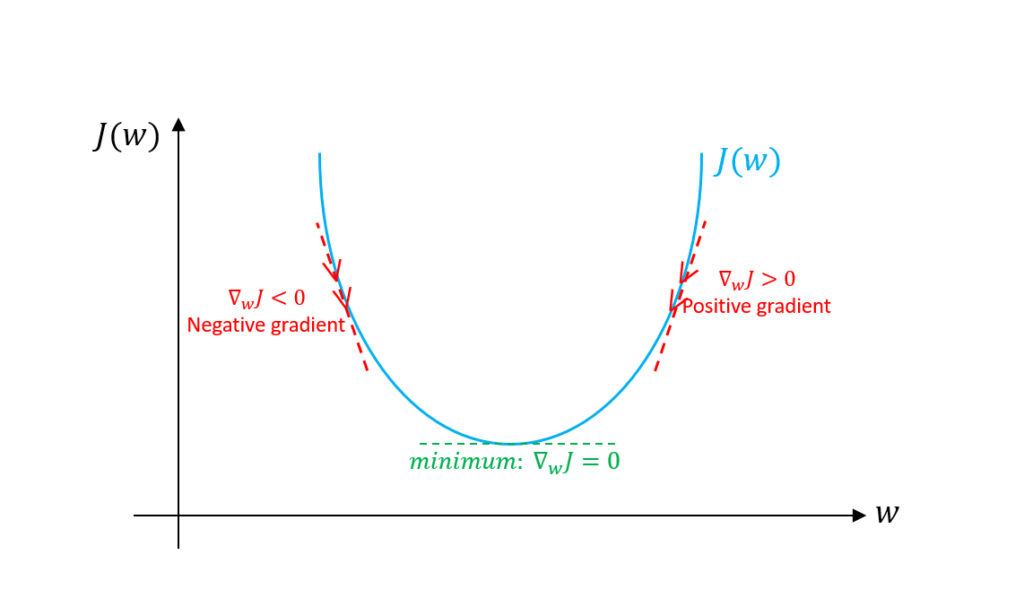

### 2. Stochastic Gradient Descent (SGD)



Stochastic Gradient Descent (SGD) is an optimization algorithm tailored for large datasets, addressing the limitations of standard Gradient Descent, which can be computationally costly on massive data. Unlike full-batch Gradient Descent, SGD randomly selects smaller batches of data (mini-batches) for each iteration. This randomness introduces a "stochastic" element, where only a subset of the dataset is processed each time, making the process more computationally efficient and suitable for large-scale deep learning models.



**Stochastic Gradient Descent Formula**



The update rule for parameters in SGD is similar to Gradient Descent but operates on mini-batches instead:



$$

\theta = \theta - \alpha \cdot \nabla_{\theta} J(\theta; x^{(i)})

$$



- **$\theta$** : Model parameters (weights)

- **$\alpha$** : Learning rate (step size)

- **$\nabla_{\theta} J(\theta; x^{(i)})$** : Gradient of the loss function $ J(\theta) $ computed on a single or mini-batch sample $ x^{(i)} $



This means the model updates parameters after each mini-batch rather than waiting for the entire dataset to process, adding speed and efficiency to large-scale training.



---



**How Stochastic Gradient Descent Works**  

1. **Initialize Parameters**: Start with initial weights and a specified learning rate.

2. **Shuffle Data**: At each iteration, shuffle the data randomly to introduce stochasticity.

3. **Process Mini-batches**: Calculate the gradient for a mini-batch and update the weights.

4. **Repeat**: Continue updating parameters on each mini-batch until reaching an approximate minimum.



**Advantages and Trade-offs of SGD**  

- **Increased Efficiency**: SGD is faster than batch Gradient Descent, especially for large datasets.

- **Higher Iterations**: Due to noisy updates from mini-batches, SGD often requires more iterations but still tends to be more computationally feasible than batch Gradient Descent.

- **Noisy Path**: The noisy nature of mini-batch updates can prevent precise convergence, sometimes bouncing around the local minimum.

### 3. Stochastic Gradient Descent with Momentum



Stochastic Gradient Descent (SGD) with Momentum is an enhancement to the standard SGD algorithm, which takes a "noisy" path when updating weights due to the use of mini-batches. This noise often requires SGD to take many iterations to reach the optimal minimum, slowing down training. To address this, **momentum** is introduced to accelerate convergence.



Momentum helps by adding a fraction of the previous update to the current update, smoothing the path toward the minimum. This addition reduces oscillations and helps SGD navigate more efficiently, especially through ravines in the loss surface. However, when using momentum, a smaller learning rate is generally advisable, as high momentum with a high learning rate can lead to overshooting the minimum.



**SGD with Momentum Formula**



The update rule for parameters in SGD with Momentum is:



$$

v_t = \gamma v_{t-1} + \alpha \cdot \nabla_{\theta} J(\theta)

$$

$$

\theta = \theta - v_t

$$



- **$ \theta $** : Model parameters (weights)

- **$ v_t $** : Velocity term, accumulating past gradients

- **$ \gamma $** : Momentum factor (typically between 0 and 1)

- **$ \alpha $** : Learning rate

- **$ \nabla_{\theta} J(\theta) $** : Gradient of the loss function with respect to $ \theta $



This equation shows that each parameter update considers not only the current gradient but also a portion of the previous velocity, helping the model move toward the optimal minimum more quickly.



---



**How SGD with Momentum Works**  

1. **Initialize Parameters and Momentum**: Start with initial weights, a learning rate, and a momentum factor.

2. **Calculate Gradients**: Compute the gradient on a mini-batch and update the velocity term.

3. **Update Weights**: Adjust the weights based on the velocity, which incorporates both the current and previous gradient directions.

4. **Repeat**: Continue updating weights until reaching convergence.



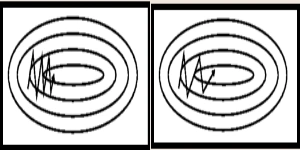



In the above image, the left part shows the convergence graph of the stochastic gradient descent algorithm. At the same time, the right side shows SGD with momentum. From the image, you can compare the path chosen by both algorithms and realize that using momentum helps reach convergence in less time. You might be thinking of using a large momentum and learning rate to make the process even faster. But remember that while increasing the momentum, the possibility of passing the optimal minimum also increases. This might result in poor accuracy and even more oscillations.





**Advantages and Considerations**  

- **Faster Convergence**: By adding momentum, SGD moves faster along the optimal path, reducing oscillations and achieving convergence in fewer steps.

- **Risk of Overshooting**: Using a large momentum value can lead to overshooting the minimum, causing the model to oscillate further from the optimal minimum. It’s recommended to balance the momentum term with a lower learning rate.

### 4. Nesterov Accelerated Gradient (NAG)



Nesterov Accelerated Gradient (NAG) optimization improves upon traditional **momentum-based gradient descent** by anticipating future gradients, allowing for more refined updates to parameters. In conventional momentum, when the momentum value is too high, the optimizer may overshoot the minimum and "bounce back," similar to a ball rolling past a low point. NAG counteracts this by taking an "anticipated" look at where the parameters will be in the next step and using this information to decide if it needs to slow down or adjust direction, improving convergence stability.



**How NAG Works**  

1. **Compute Next Step Prediction**: The estimated parameters for the next time step $ \theta - \gamma v_{t-1} $ are calculated, where $ \gamma $ represents the momentum coefficient.

2. **Gradient Calculation**: Calculate the gradient at the anticipated future parameter value, $ \nabla J(\theta - \gamma v_{t-1}) $.

3. **Parameter Update**: Use the calculated gradient to update parameters based on both the current and anticipated gradients.



This anticipatory gradient step allows NAG to decide on speeding up or slowing down based on how steep the slope is, resulting in more effective handling of both steep and flat regions in the optimization landscape.



**NAG Formula**  

The NAG weight update mechanism consists of:

1. **Prediction of Next Parameter**:

   $$

   \theta_{t+1}^{\text{pred}} = \theta_t - \gamma v_{t-1}

   $$

2. **Gradient Computation**:

   $$

   \nabla J(\theta_{t+1}^{\text{pred}})

   $$

3. **Velocity Update**:

   $$

   v_t = \gamma v_{t-1} + \alpha \nabla J(\theta_{t+1}^{\text{pred}})

   $$

4. **Parameter Update**:

   $$

   \theta_{t+1} = \theta_t - v_t

   $$



- **$ \gamma $**: Momentum coefficient.

- **$ \alpha $**: Learning rate.

- **$ v_t $**: Velocity at time step $ t $, which adjusts based on the predicted gradient.



**Advantages of NAG**  

- **Anticipates Future Gradients**: By considering the next step’s gradient, NAG can better control momentum, slowing down on flat surfaces and speeding up on steeper slopes.

- **Reduced Overshooting**: With gradient prediction, NAG minimizes the risk of crossing over minima, enhancing convergence stability.



**Limitations of NAG**  

- **Uniform Parameter Treatment**: NAG does not adapt updates based on parameter importance, treating all parameters uniformly, which may not be ideal for complex datasets with varying feature importance.

### 5. Mini-Batch Gradient Descent



Mini-Batch Gradient Descent is a variant of Gradient Descent that balances between full-batch Gradient Descent and Stochastic Gradient Descent (SGD). Instead of processing the entire dataset at once (batch) or one sample at a time (stochastic), Mini-Batch Gradient Descent splits the dataset into smaller, more manageable subsets called **mini-batches**. This approach speeds up training and makes the process more computationally efficient, as it doesn’t require loading all data into memory.



Mini-Batch Gradient Descent strikes a balance between speed and accuracy, combining the efficiency of mini-batches with more stable convergence, making it an effective and widely used optimization technique.



**Mini-Batch Gradient Descent Formula**



The parameter update rule for Mini-Batch Gradient Descent is similar to standard Gradient Descent but applied to mini-batches:



$$

\theta = \theta - \alpha \cdot \nabla_{\theta} J(\theta; X_{\text{batch}})

$$



- **$ \theta $** : Model parameters (weights)

- **$ \alpha $** : Learning rate (step size)

- **$ \nabla_{\theta} J(\theta; X_{\text{batch}}) $** : Gradient of the loss function with respect to $ \theta $, calculated using the mini-batch $ X_{\text{batch}} $



---



**How Mini-Batch Gradient Descent Works**  

1. **Initialize Parameters**: Set initial weights and learning rate.

2. **Create Mini-Batches**: Divide the dataset into smaller batches of a defined size.

3. **Calculate Gradient for Each Batch**: For each mini-batch, compute the gradient of the loss function and update the parameters.

4. **Repeat**: Continue iterating over mini-batches until reaching convergence.



**Advantages and Limitations**  

- **Efficiency**: Requires fewer iterations than standard SGD and loads smaller data portions into memory, improving computational efficiency.

- **Balanced Convergence**: The noise in mini-batch updates is reduced compared to SGD, making it smoother, yet it's less computationally intense than full-batch Gradient Descent.

- **Hyperparameter Tuning**: Requires tuning of the "mini-batch size," typically set to 32 by default, but may vary based on data and hardware.

- **Final Accuracy**: In some cases, Mini-Batch Gradient Descent may result in slightly poorer final accuracy than other techniques.

### 6. Adagrad (Adaptive Gradient Descent)



Adagrad, or Adaptive Gradient Descent, is an optimization algorithm that dynamically adjusts the learning rate for each parameter based on historical gradient information. Unlike traditional Gradient Descent, where a fixed learning rate is applied across all parameters, Adagrad scales the learning rate inversely with the frequency of parameter updates. This scaling ensures that infrequent parameters receive higher learning rates, making Adagrad especially useful for datasets with sparse and dense features, as it treats them differently based on their needs.



**Adagrad Formula**



The parameter update rule in Adagrad is:



$$

\theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{G_{t} + \epsilon}} \cdot \nabla_{\theta} J(\theta_t)

$$



- **$ \theta_t $** : Model parameters at step $ t $

- **$ \alpha $** : Initial learning rate (constant)

- **$ G_t $** : Sum of squared gradients up to step $ t $

- **$ \epsilon $** : Small positive constant to prevent division by zero

- **$ \nabla_{\theta} J(\theta_t) $** : Gradient of the loss function at $ t $ with respect to $ \theta $



This formula shows how Adagrad modifies the learning rate at each step by dividing by the accumulated squared gradients, which makes it sensitive to each parameter's past updates.



---



**How Adagrad Works**  

1. **Initialize Parameters**: Define initial weights and the initial learning rate $ \alpha $.

2. **Compute Gradient**: Calculate the gradient for each parameter.

3. **Accumulate Gradient Squares**: Sum up the square of gradients in $ G_t $ for each parameter.

4. **Adjust Learning Rate**: Update each parameter based on the adjusted learning rate derived from $ G_t $.

5. **Repeat**: Continue iterating until reaching convergence.



**Advantages and Limitations**  

- **Automatic Adjustment**: The learning rate adapts automatically, eliminating the need to manually tune it for each feature.

- **Better Convergence for Sparse Data**: Adagrad’s variable learning rate is beneficial for sparse data features, as frequently updated features receive lower learning rates.

- **Learning Rate Decay**: A primary limitation is that Adagrad’s learning rate can become too small over time, leading to a situation where the model stops learning further, as accumulated gradients in $ G_t $ increase over time.


### 7. RMSprop (Root Mean Square Propagation)



RMSprop is a popular optimizer designed to address the limitations of other gradient descent algorithms, especially for large datasets and mini-batch processing. RMSprop is an evolution of the RPROP algorithm and solves the issue of varying gradient scales across parameters. By keeping a moving average of squared gradients, RMSprop dynamically adjusts the learning rate for each parameter, making it adaptive to the gradient’s behavior.



RMSprop’s primary benefit is its capacity to control parameter oscillations, particularly for features with a higher gradient variance. This feature is especially useful in preventing any single parameter from dominating the learning process, allowing the model to consider all features more evenly.



**RMSprop Formula**



The RMSprop update for each parameter $ \theta $ is as follows:



1. **Compute Moving Average of Squared Gradients**:

   $$

   E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) \cdot g_t^2

   $$



2. **Update Parameters**:

   $$

   \theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{E[g^2]_t + \epsilon}} \cdot g_t

   $$



- **$ \theta $** : Model parameters (weights)

- **$ E[g^2]_t $** : Exponential moving average of squared gradients

- **$ g_t $** : Gradient at iteration $ t $

- **$ \alpha $** : Learning rate (manually set)

- **$ \gamma $** : Forgetting factor (typically set to around 0.9)

- **$ \epsilon $** : Small constant to prevent division by zero



This formula shows how RMSprop adapts the learning rate for each parameter by dividing by the square root of the moving average of squared gradients.



---



**How RMSprop Works**  

1. **Initialize Parameters**: Define initial weights and learning rate $ \alpha $, along with the forgetting factor $ \gamma $.

2. **Compute Gradients**: Calculate the gradient $ g_t $ for each mini-batch.

3. **Update Moving Average of Gradients**: Use the exponential moving average to adjust each parameter based on recent gradients.

4. **Update Parameters**: Adjust each parameter based on the adjusted learning rate derived from the moving average.

5. **Repeat**: Continue iterating until reaching convergence.



**Advantages and Limitations**  

- **Adaptive Learning Rates**: RMSprop’s adaptive learning rate penalizes parameters with high variance, ensuring that the model learns from a balanced set of features.

- **Efficiency with Large Datasets**: RMSprop combines the robustness of RPROP with the efficiency of mini-batch updates, making it well-suited for large datasets.

- **Manual Learning Rate Tuning**: While it reduces learning rate decay issues found in Adagrad, RMSprop still requires manually setting an initial learning rate, which may require tuning for specific tasks.

### 8. AdaDelta



AdaDelta is an advanced adaptive learning rate optimizer developed to address the limitations of AdaGrad and RMSprop. Both AdaGrad and RMSprop suffer from issues like learning rate decay and the need for manual initialization of the learning rate, which can hinder the model’s ability to continue learning. AdaDelta introduces two state variables to address these challenges: one tracks the second moment of gradients, and the other tracks the second moment of parameter updates. This dynamic approach allows AdaDelta to automatically adapt learning rates during training without manual tuning.



**AdaDelta Formula**



AdaDelta’s parameter updates are governed by the following steps:



1. **Accumulate Squared Gradients**:

   $$

   E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) \cdot g_t^2

   $$



2. **Calculate Parameter Updates**:

   $$

   \Delta \theta_t = - \frac{\sqrt{E[\Delta \theta^2]_{t-1} + \epsilon}}{\sqrt{E[g^2]_t + \epsilon}} \cdot g_t

   $$



3. **Update Accumulated Updates**:

   $$

   E[\Delta \theta^2]_t = \gamma E[\Delta \theta^2]_{t-1} + (1 - \gamma) \cdot (\Delta \theta_t)^2

   $$



- **$ E[g^2]_t $** : Exponential moving average of squared gradients

- **$ E[\Delta \theta^2]_t $** : Exponential moving average of squared parameter updates

- **$ g_t $** : Gradient at iteration $ t $

- **$ \gamma $** : Decay rate, often set around 0.95

- **$ \epsilon $** : Small positive constant to prevent division by zero



This formula enables AdaDelta to dynamically adapt learning rates without manual input, thus solving issues like excessive decay in learning rates seen in other optimizers.



---



**How AdaDelta Works**  

1. **Initialize Parameters**: Define the initial weights, and choose decay rate $ \gamma $ and small constant $ \epsilon $.

2. **Calculate Moving Averages**: Compute the moving average of the squared gradient and parameter updates.

3. **Scale and Update Parameters**: Adjust the parameter update dynamically based on the scaled learning rate derived from moving averages.

4. **Repeat**: Continue the process until the model converges.



**Advantages and Limitations**  

- **No Manual Learning Rate**: AdaDelta eliminates the need to set a manual learning rate by adapting automatically over time.

- **Resolves Learning Rate Decay**: Unlike AdaGrad and RMSprop, AdaDelta’s updates are resilient to diminishing learning rates, allowing the model to continue learning even in later stages.

- **Complex Parameter Updates**: Despite its advantages, AdaDelta’s parameter update process may be computationally intensive compared to simpler optimizers.

### 9. Adam



Adam, short for **Adaptive Moment Estimation**, is an advanced optimization algorithm widely used in deep learning. It extends the **Stochastic Gradient Descent (SGD)** method by adaptively adjusting learning rates for each weight of the neural network. Unlike SGD, which applies a fixed learning rate, Adam dynamically adapts learning rates based on the first and second moments (mean and uncentered variance) of past gradients.



Adam combines the advantageous features of **AdaGrad** and **RMSProp**: it uses the first moment for stability in updates, as in RMSProp, and accumulates the past squared gradients for adaptive learning rates, similar to AdaGrad. This combination allows Adam to effectively balance efficiency and stability, leading to fast convergence with lower memory and tuning requirements.



**Adam Optimizer Formula**



The following steps define Adam’s weight update mechanism:



1. **Compute Gradients**: Calculate the gradient $ g_t $ at time $ t $.

2. **Estimate First Moment (Mean)**:

   $$

   m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t

   $$

3. **Estimate Second Moment (Variance)**:

   $$

   v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2

   $$

4. **Bias Correction**:

   $$

   \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}

   $$

5. **Parameter Update**:

   $$

   \theta_{t+1} = \theta_t - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}

   $$



- **$ m_t $** : Exponentially weighted moving average of the gradients (first moment).

- **$ v_t $** : Exponentially weighted moving average of squared gradients (second moment).

- **$ \beta_1 $, $ \beta_2 $** : Decay rates for the first and second moment estimates, often set to 0.9 and 0.999, respectively.

- **$ \alpha $** : Initial learning rate.

- **$ \epsilon $** : Small constant to prevent division by zero.



The result is an adaptive optimizer that provides efficient and stable weight updates throughout the training process, minimizing computation time and memory usage.



---



**How Adam Works**  

1. **Initialize Parameters**: Set initial weights and tuning parameters, including $ \alpha $, $ \beta_1 $, $ \beta_2 $, and $ \epsilon $.

2. **Gradient Computation**: Calculate gradients for the current parameters.

3. **Moving Averages Update**: Compute moving averages of both the gradient and the squared gradient.

4. **Bias Correction**: Apply bias correction to normalize estimates.

5. **Parameter Update**: Use the adjusted estimates to update weights.

6. **Repeat**: Continue iterating until convergence or desired performance.



**Advantages and Limitations**  

- **Adaptive Learning Rate**: Adam automatically adjusts learning rates, leading to faster and more stable convergence.

- **Low Tuning Needs**: With minimal tuning requirements, Adam is an accessible choice, especially for deep learning beginners.

- **Efficiency vs. Generalization**: While Adam prioritizes computation speed, it may not generalize as well as SGD for some datasets, making SGD preferable for applications prioritizing data point focus over computational speed.

## Race to the Global Minima

Here is an animation of how different optimizers help the model reach the global minima for a particular data space:



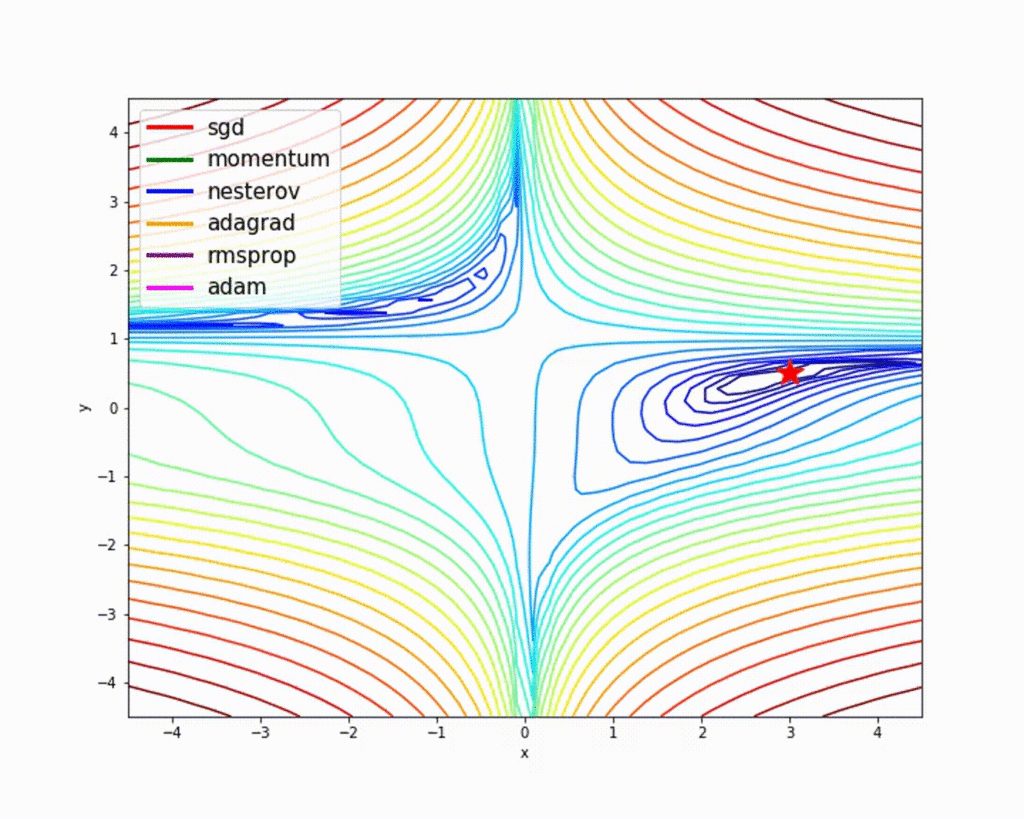

References:



*   [A Comprehensive Guide on Optimizers in Deep Learning](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/)

*   [Exploring Optimizers in Machine Learning](https://fritz.ai/optimizers-in-machine-learning/)


# 🚀 First Challenge Question

In this problem, you will use the MobileNet pre-defined model from PyTorch to train on the CIFAR-100 dataset. You will explore the effects of various optimizers on the model’s performance.



**Compare the performance of different optimization algorithms while training the MobileNet model on the CIFAR-100 dataset.**



Use the following optimizers:





*   SGD

*   SGD + momentum

*   RMSprop

*   Adadelta

*   Adagrad

*   Adam



**To increase the speed, it is recommended to write the training loop as a function and use it. Make sure that the necessary variables, especially the model, are redefined for each experiment.**






Please consider the steps and fill *#TODO* sections.



For more information, please refer to the following resources.



(Having information about MobilenetV2 architecture is necessary)



- https://www.kaggle.com/discussions/getting-started/433540

- https://paperswithcode.com/method/mobilenetv2

- https://www.analyticsvidhya.com/blog/2023/12/what-is-mobilenetv2/

- https://towardsdatascience.com/review-mobilenetv2-light-weight-model-image-classification-8febb490e61c

## Task

In [4]:
# Load the CIFAR-100 dataset, resize them to 224 and convert them to tensor

transform = transforms.Compose(

    [

        transforms.Resize(224),

        transforms.ToTensor(),

        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

    ]

)

In [5]:
# Define dataset and dataloader objects. Set batch_size to 32, just shuffle train data.



batch_size = 32



trainset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)



testset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

100%|██████████| 169001437/169001437 [00:03<00:00, 47252270.29it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
# Define the MobileNet model

# Define mobilenetv2 object from pytorch models. Don't use pre-trained weights.

# Define proper classification layer w.r.t. our dataset.

# Define the proper loss and optimizer.



mobilenet = models.mobilenet_v2(weights=None)

num_classes = 100

mobilenet.classifier[1] = nn.Linear(mobilenet.last_channel, num_classes)

mobilenet = mobilenet.to(DEVICE)



criterion = nn.CrossEntropyLoss()



learning_rate = 0.001



optimizer_sgd = optim.SGD(mobilenet.parameters(), lr=learning_rate)



optimizer_sgd_momentum = optim.SGD(mobilenet.parameters(), lr=learning_rate, momentum=0.9)



optimizer_rmsprop = optim.RMSprop(mobilenet.parameters(), lr=learning_rate)



optimizer_adadelta = optim.Adadelta(mobilenet.parameters(), lr=learning_rate)



optimizer_adagrad = optim.Adagrad(mobilenet.parameters(), lr=learning_rate)



optimizer_adam = optim.Adam(mobilenet.parameters(), lr=learning_rate)

In [7]:
def train_model(mobilenet, criterion, optimizer, trainloader, testloader, num_epochs=10):



    # Lists to store loss and accuracy

    train_losses = []

    val_losses = []

    train_accuracies = []

    val_accuracies = []



    mobilenet.to(DEVICE)

    # Training loop

    for epoch in range(num_epochs):  # Adjust the number of epochs as needed

        running_loss = 0.0

        correct = 0

        total = 0



        # Training phase

        mobilenet.train()

        for i, data in enumerate(trainloader, 0):

            inputs, labels = data



            # move data to device

            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)



            # zero the gradients

            optimizer.zero_grad()



            # Get the outputs

            outputs = mobilenet(inputs)



            # calculate the loss

            loss = criterion(outputs, labels)



            # Update weights

            loss.backward()

            optimizer.step()



            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)

            correct += (predicted == labels).sum().item()



        train_losses.append(running_loss / len(trainloader))

        train_accuracies.append(100 * correct / total)



        # Validation phase

        mobilenet.eval()

        val_loss = 0.0

        correct = 0

        total = 0



        # made network creates no gradients

        with torch.no_grad():

            for data in testloader:

                images, labels = data

                images, labels = images.to(DEVICE), labels.to(DEVICE)

                outputs = mobilenet(images)

                loss = criterion(outputs, labels)

                val_loss += loss.item()



                # find the predicted classes

                _, predicted = torch.max(outputs.data, 1)

                total += labels.size(0)



                # Calculate the correctness

                correct += (predicted == labels).sum().item()



        val_losses.append(val_loss / len(testloader))

        val_accuracies.append(100 * correct / total)



        print(f'Epoch {epoch + 1}, Train Loss: {train_losses[-1]:.3f}, Val Loss: {val_losses[-1]:.3f}, Train Acc: {train_accuracies[-1]:.2f}%, Val Acc: {val_accuracies[-1]:.2f}%')



    print('Finished Training')

    return train_losses, val_losses, train_accuracies, val_accuracies

In [8]:
results_summary = []

def evaluate_test_accuracy(mobilenet, testloader,optimizer):

    mobilenet.to(DEVICE)

    mobilenet.eval()

    correct = 0

    total = 0



    with torch.no_grad():

        for inputs, labels in testloader:

            # Move data to device

            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)



            # Forward pass

            outputs = mobilenet(inputs)



            # Calculate accuracy

            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)

            correct += (predicted == labels).sum().item()



    test_accuracy = 100 * correct / total

    print(f'Accuracy of the network with {optimizer} on the test images: {test_accuracy:.2f}%')



    return test_accuracy

def evaluate_optimizers():

    optimizers = {

        "SGD": optimizer_sgd,

        "SGD + Momentum": optimizer_sgd_momentum,

        "RMSprop": optimizer_rmsprop,

        "Adadelta": optimizer_adadelta,

        "Adagrad": optimizer_adagrad,

        "Adam": optimizer_adam

    }



    for optimizer_name, optimizer in optimizers.items():

        print(f'\nTraining with {optimizer_name}')

        start_time = time.time()



        mobilenet.apply(lambda m: m.reset_parameters() if hasattr(m, 'reset_parameters') else None)



        train_losses, val_losses, train_accuracies, val_accuracies = train_model(

            mobilenet, criterion, optimizer, trainloader, testloader, num_epochs=10

        )



        training_time = time.time() - start_time

        results_summary.append({

            "Optimizer": optimizer_name,

            "Val Loss (Epoch 1)": val_losses[0],

            "Val Acc (Epoch 1)": val_accuracies[0],

            "Val Loss (Epoch 5)": val_losses[4],

            "Val Acc (Epoch 5)": val_accuracies[4],

            "Val Loss (Epoch 10)": val_losses[9],

            "Val Acc (Epoch 10)": val_accuracies[9],

            "Total Training Time": training_time

        })



        plt.figure(figsize=(12, 5))



        plt.subplot(1, 2, 1)

        plt.plot(train_losses, label='Train Loss')

        plt.plot(val_losses, label='Val Loss')

        plt.title(f'{optimizer_name} - Loss')

        plt.xlabel('Epoch')

        plt.ylabel('Loss')

        plt.legend()



        plt.subplot(1, 2, 2)

        plt.plot(train_accuracies, label='Train Acc')

        plt.plot(val_accuracies, label='Val Acc')

        plt.title(f'{optimizer_name} - Accuracy')

        plt.xlabel('Epoch')

        plt.ylabel('Accuracy (%)')

        plt.legend()



        plt.show()



        test_accuracy = evaluate_test_accuracy(mobilenet, testloader,optimizer_name)



def display_summary():

    summary_df = pd.DataFrame(results_summary)

    display(summary_df)


Training with SGD
Epoch 1, Train Loss: 4.567, Val Loss: 4.486, Train Acc: 1.70%, Val Acc: 3.03%
Epoch 2, Train Loss: 4.443, Val Loss: 4.344, Train Acc: 3.24%, Val Acc: 4.65%
Epoch 3, Train Loss: 4.314, Val Loss: 4.205, Train Acc: 4.75%, Val Acc: 6.64%
Epoch 4, Train Loss: 4.189, Val Loss: 4.081, Train Acc: 6.22%, Val Acc: 7.97%
Epoch 5, Train Loss: 4.081, Val Loss: 3.975, Train Acc: 7.76%, Val Acc: 9.69%
Epoch 6, Train Loss: 3.977, Val Loss: 3.882, Train Acc: 8.84%, Val Acc: 10.96%
Epoch 7, Train Loss: 3.886, Val Loss: 3.782, Train Acc: 9.85%, Val Acc: 11.54%
Epoch 8, Train Loss: 3.803, Val Loss: 3.708, Train Acc: 10.92%, Val Acc: 12.44%
Epoch 9, Train Loss: 3.733, Val Loss: 3.625, Train Acc: 11.92%, Val Acc: 14.02%
Epoch 10, Train Loss: 3.661, Val Loss: 3.570, Train Acc: 12.57%, Val Acc: 14.35%
Finished Training


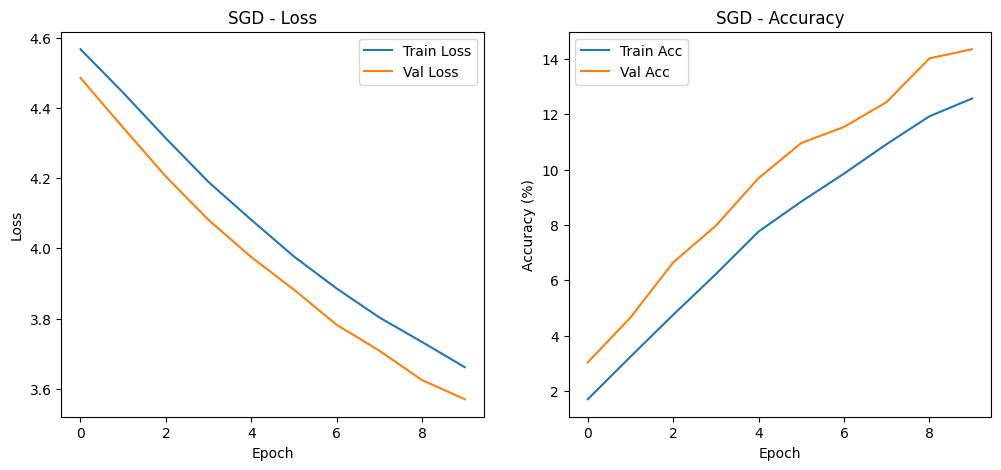

Accuracy of the network with SGD on the test images: 14.35%

Training with SGD + Momentum
Epoch 1, Train Loss: 4.206, Val Loss: 3.803, Train Acc: 5.31%, Val Acc: 10.65%
Epoch 2, Train Loss: 3.653, Val Loss: 3.381, Train Acc: 12.69%, Val Acc: 17.65%
Epoch 3, Train Loss: 3.275, Val Loss: 3.039, Train Acc: 19.01%, Val Acc: 23.55%
Epoch 4, Train Loss: 2.970, Val Loss: 2.733, Train Acc: 24.76%, Val Acc: 30.01%
Epoch 5, Train Loss: 2.688, Val Loss: 2.511, Train Acc: 30.49%, Val Acc: 33.36%
Epoch 6, Train Loss: 2.446, Val Loss: 2.301, Train Acc: 35.45%, Val Acc: 38.59%
Epoch 7, Train Loss: 2.240, Val Loss: 2.219, Train Acc: 39.87%, Val Acc: 40.78%
Epoch 8, Train Loss: 2.057, Val Loss: 2.069, Train Acc: 44.07%, Val Acc: 43.61%
Epoch 9, Train Loss: 1.900, Val Loss: 1.972, Train Acc: 47.74%, Val Acc: 46.31%
Epoch 10, Train Loss: 1.762, Val Loss: 1.889, Train Acc: 51.26%, Val Acc: 48.05%
Finished Training


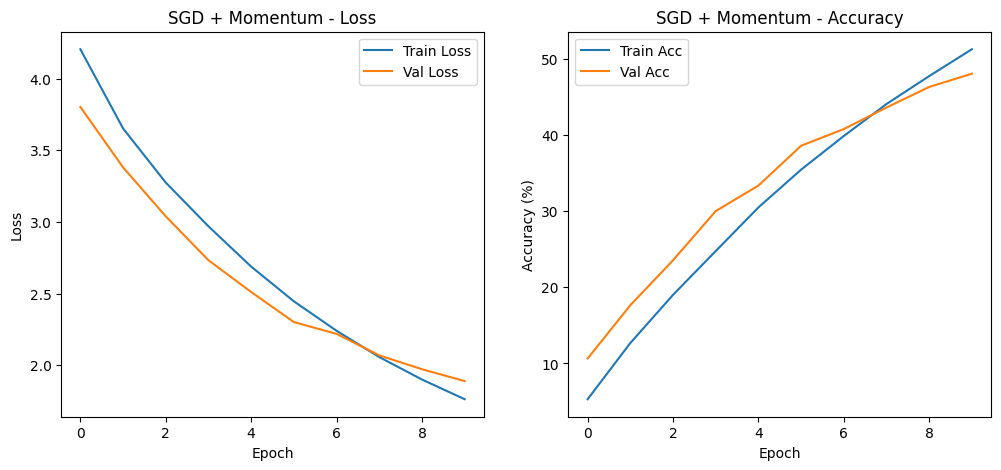

Accuracy of the network with SGD + Momentum on the test images: 48.05%

Training with RMSprop
Epoch 1, Train Loss: 3.874, Val Loss: 3.373, Train Acc: 9.57%, Val Acc: 16.06%
Epoch 2, Train Loss: 3.063, Val Loss: 2.886, Train Acc: 22.12%, Val Acc: 25.37%
Epoch 3, Train Loss: 2.599, Val Loss: 2.557, Train Acc: 31.38%, Val Acc: 33.35%
Epoch 4, Train Loss: 2.262, Val Loss: 2.196, Train Acc: 38.77%, Val Acc: 40.78%
Epoch 5, Train Loss: 2.018, Val Loss: 2.031, Train Acc: 44.27%, Val Acc: 44.42%
Epoch 6, Train Loss: 1.810, Val Loss: 2.101, Train Acc: 49.32%, Val Acc: 43.46%
Epoch 7, Train Loss: 1.638, Val Loss: 1.846, Train Acc: 53.56%, Val Acc: 49.61%
Epoch 8, Train Loss: 1.493, Val Loss: 1.779, Train Acc: 57.15%, Val Acc: 51.04%
Epoch 9, Train Loss: 1.360, Val Loss: 1.816, Train Acc: 60.50%, Val Acc: 50.60%
Epoch 10, Train Loss: 1.247, Val Loss: 1.689, Train Acc: 63.12%, Val Acc: 54.84%
Finished Training


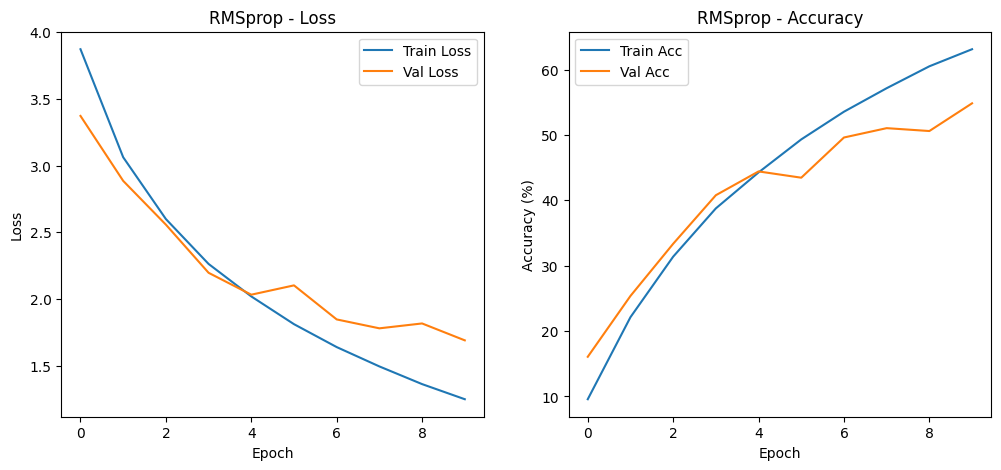

Accuracy of the network with RMSprop on the test images: 54.84%

Training with Adadelta
Epoch 1, Train Loss: 4.607, Val Loss: 4.566, Train Acc: 1.49%, Val Acc: 2.29%
Epoch 2, Train Loss: 4.554, Val Loss: 4.513, Train Acc: 2.23%, Val Acc: 2.69%
Epoch 3, Train Loss: 4.510, Val Loss: 4.465, Train Acc: 2.61%, Val Acc: 3.11%
Epoch 4, Train Loss: 4.468, Val Loss: 4.420, Train Acc: 2.94%, Val Acc: 3.64%
Epoch 5, Train Loss: 4.416, Val Loss: 4.355, Train Acc: 3.52%, Val Acc: 4.76%
Epoch 6, Train Loss: 4.357, Val Loss: 4.294, Train Acc: 4.21%, Val Acc: 5.34%
Epoch 7, Train Loss: 4.298, Val Loss: 4.224, Train Acc: 4.93%, Val Acc: 6.02%
Epoch 8, Train Loss: 4.246, Val Loss: 4.176, Train Acc: 5.63%, Val Acc: 6.44%
Epoch 9, Train Loss: 4.200, Val Loss: 4.136, Train Acc: 5.99%, Val Acc: 7.12%
Epoch 10, Train Loss: 4.158, Val Loss: 4.099, Train Acc: 6.36%, Val Acc: 7.13%
Finished Training


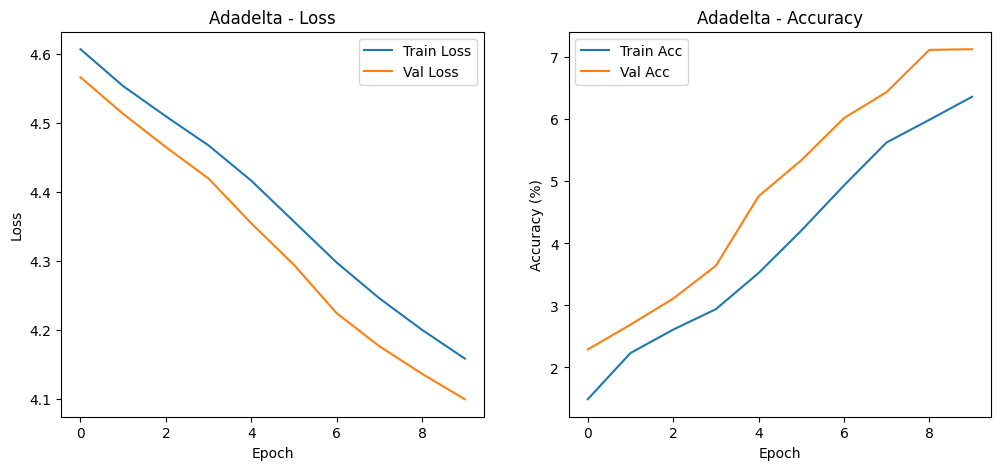

Accuracy of the network with Adadelta on the test images: 7.13%

Training with Adagrad
Epoch 1, Train Loss: 3.992, Val Loss: 3.692, Train Acc: 8.09%, Val Acc: 12.47%
Epoch 2, Train Loss: 3.645, Val Loss: 3.468, Train Acc: 13.48%, Val Acc: 16.88%
Epoch 3, Train Loss: 3.465, Val Loss: 3.313, Train Acc: 16.96%, Val Acc: 19.94%
Epoch 4, Train Loss: 3.331, Val Loss: 3.208, Train Acc: 19.27%, Val Acc: 22.25%
Epoch 5, Train Loss: 3.238, Val Loss: 3.118, Train Acc: 20.93%, Val Acc: 23.39%
Epoch 6, Train Loss: 3.155, Val Loss: 3.050, Train Acc: 22.59%, Val Acc: 24.83%
Epoch 7, Train Loss: 3.093, Val Loss: 2.987, Train Acc: 23.65%, Val Acc: 25.72%
Epoch 8, Train Loss: 3.034, Val Loss: 2.938, Train Acc: 24.72%, Val Acc: 26.62%
Epoch 9, Train Loss: 2.983, Val Loss: 2.887, Train Acc: 25.62%, Val Acc: 27.50%
Epoch 10, Train Loss: 2.932, Val Loss: 2.850, Train Acc: 26.70%, Val Acc: 28.02%
Finished Training


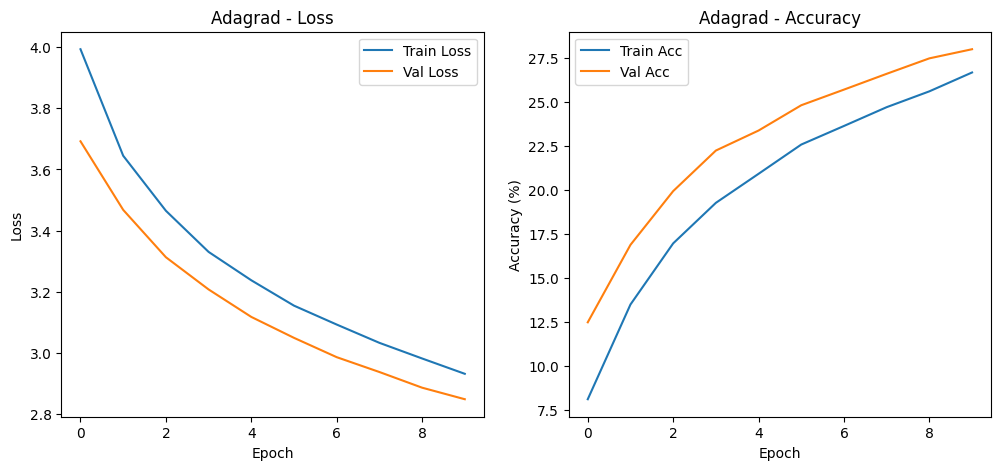

Accuracy of the network with Adagrad on the test images: 28.02%

Training with Adam
Epoch 1, Train Loss: 3.741, Val Loss: 3.199, Train Acc: 11.33%, Val Acc: 18.68%
Epoch 2, Train Loss: 2.918, Val Loss: 2.619, Train Acc: 24.81%, Val Acc: 31.50%
Epoch 3, Train Loss: 2.460, Val Loss: 2.263, Train Acc: 34.70%, Val Acc: 38.35%
Epoch 4, Train Loss: 2.143, Val Loss: 2.124, Train Acc: 41.67%, Val Acc: 41.99%
Epoch 5, Train Loss: 1.906, Val Loss: 1.860, Train Acc: 47.27%, Val Acc: 48.86%
Epoch 6, Train Loss: 1.712, Val Loss: 1.782, Train Acc: 51.64%, Val Acc: 50.85%
Epoch 7, Train Loss: 1.567, Val Loss: 1.694, Train Acc: 55.46%, Val Acc: 52.50%
Epoch 8, Train Loss: 1.424, Val Loss: 1.604, Train Acc: 58.91%, Val Acc: 54.89%
Epoch 9, Train Loss: 1.298, Val Loss: 1.594, Train Acc: 62.17%, Val Acc: 55.87%
Epoch 10, Train Loss: 1.179, Val Loss: 1.633, Train Acc: 65.08%, Val Acc: 55.97%
Finished Training


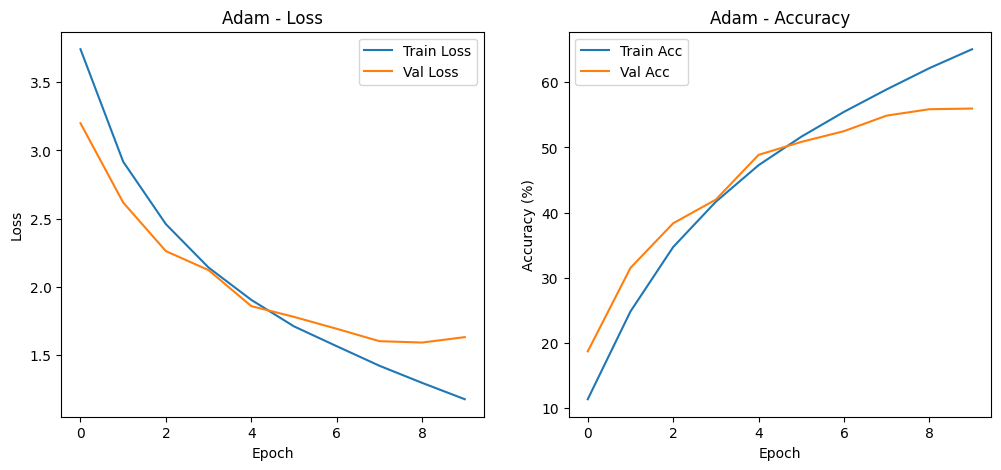

Accuracy of the network with Adam on the test images: 55.97%


In [9]:
evaluate_optimizers()

In [10]:
display_summary()

,Optimizer,Val Loss (Epoch 1),Val Acc (Epoch 1),Val Loss (Epoch 5),Val Acc (Epoch 5),Val Loss (Epoch 10),Val Acc (Epoch 10),Total Training Time
0,SGD,4.485712,3.03,3.975055,9.69,3.570096,14.35,1981.259613
1,SGD + Momentum,3.802970,10.65,2.510911,33.36,1.889086,48.05,2012.149539
2,RMSprop,3.373029,16.06,2.031460,44.42,1.688782,54.84,2002.141182
3,Adadelta,4.566497,2.29,4.354502,4.76,4.099185,7.13,2018.728010
4,Adagrad,3.691772,12.47,3.118273,23.39,2.849507,28.02,1996.966958
5,Adam,3.199372,18.68,1.860396,48.86,1.633276,55.97,2014.944600


**Do it for all mentioned optimizers and then report the following for all:**





*   Val loss and val accuracy after epoch 1

*   Val loss and val accuracy after epoch 5

*   Val loss and val accuracy after epoch 10

*   Total training time



**Note that all values should be existed in your notebook. It is recommended to prepare a table for these values ​​at the end. Think about the results of this table.**


# 🚀 Second Challenge Question

In this task you're goinig to implement and train a ResNet model from scratch on images, crawled from DigiKala website and classifiy them into 10 classes.



Please consider the steps and fill *#TODO* sections

Please use just trainset and valdset of following dataset.



[Dataset](https://drive.google.com/drive/folders/1-7x1s7daX-62VWDoKoXZqRs0YxOkrQeQ?usp=sharing)



First add a shortcut of shared dir. to your drive then work with it.

In [2]:
import os

import torch

import torch.nn as nn

import torch.optim as optim

from torch.utils.data import DataLoader, Dataset

from torchvision import transforms

from torchvision.models import resnet18

from torchvision.io import read_image

import matplotlib.pyplot as plt

from PIL import Image

import zipfile

In [3]:
!pip install gdown

In [7]:
destination = "dataset.zip" 

!gdown --fuzzy https://drive.google.com/file/d/1Mc4skPZe3aehbJ5Zi5TgBNlTxAS797jS/view -O {destination}

with zipfile.ZipFile(destination, 'r') as zip_ref:
    zip_ref.extractall("dataset") 
    print("Extraction complete.")

Downloading...
From (original): https://drive.google.com/uc?id=1Mc4skPZe3aehbJ5Zi5TgBNlTxAS797jS
From (redirected): https://drive.google.com/uc?id=1Mc4skPZe3aehbJ5Zi5TgBNlTxAS797jS&confirm=t&uuid=cc013840-e9d4-4b3a-b3c2-6ef32ae8ab7f
To: /kaggle/working/dataset.zip
100%|████████████████████████████████████████| 406M/406M [00:05<00:00, 73.1MB/s]
Extraction complete.


In [8]:
# Define transforms for training and validation
# In this transform please apply data augmentation techniques e.g.: RandomResizedCrop to 224, RandomHorizontalFlip, RandomRotation up 10 degrees, ColorJitter, ...
train_transform = transforms.Compose([
    #TODO
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  
    transforms.ToTensor(),
])


# Decide whether to apply augmentation to the validation transform or not. If not, consider the image spatial consistency between train and val.
val_transform = transforms.Compose([
    #TODO
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [9]:
# Because we wanna use custom dataset, we should define our own dataset class, inheriting from Dataset class.
# In this dataset class, we will read all data from storage and make proper labels for them and define iterator on them.

class ImageClassificationDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # loop through the dataset root path (containing class subdir.), create the class dir
        # append image absolute paths to the image_paths
        # append label indeces (starting from 0 instead of 1) to the labels list.
        for label in sorted(os.listdir(root_dir)):
            class_dir = os.path.join(root_dir, label)
            if os.path.isdir(class_dir):
                for img_file in os.listdir(class_dir):
                    if img_file.endswith('.jpg'):
                        self.image_paths.append(os.path.join(class_dir, img_file))
                        self.labels.append(int(label) - 1)

    def __len__(self):
        return len(self.image_paths)

    # Read the current image as PIL images and convert them to RGB
    # eaxtract proper label
    # apply transformation on the image
    # Return image and label
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [11]:
# Define train and validation dataset objects with suitable paths and transforms.
trainset = ImageClassificationDataset(root_dir='/kaggle/working/dataset/trainset', transform=train_transform)
validset = ImageClassificationDataset(root_dir='/kaggle/working/dataset/validset', transform=val_transform)

trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
validloader = DataLoader(validset, batch_size=32, shuffle=False)

In [12]:
# In this section we will build our ResNet architecture.
# We will build the model in modular approach.
# First we will define basic blocks of ResNet containing
# Conv and BN layers, activation functions and residual connections.
# We targeted implementing ResNet-18 model.
# Stach layers upon each other and finally complete the architecture.


class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()

        # define conv1 with input channels and output channels (we won't increase depth of net in each block)
        # set the kernel size to 3, padding to 1 and stride with the provided stride. disable the bias term.
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)

        # Define the bn1 layer on the output of the conv1
        self.bn1 = nn.BatchNorm2d(out_channels)

        # Define relu act. func. and make it inplace True
        self.relu = nn.ReLU(inplace=True)

        # define conv2 with proper input channels and output channels (we won't increase depth of net in each block)
        # set the kernel size to 3, padding to 1 and stride to 1. disable the bias term.
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)

        # Define bn2 as same as bn1
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        # identitiy is for res connection
        identity = x

        # if we have downsampled the input of block, so downsample the identity to
        # avoid shape inconsistency
        if self.downsample is not None:
            identity = self.downsample(x)
        # our net is as follows
        '''
        conv1->bn1->act func->conv2->bn2->residual connection->act func
        '''
        #implement the steps.
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        out += identity
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        '''
        args:
            block: Class of basic block.
            layers: list of numbers of basic blocks in each layer.
            num classes: size of classifier.
        '''
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)

        # Define the max pool layer on 2D tensors with kernel size 3, padding 1 and stride 2
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # next layers are defining our residual layers.
        # each layer takes the basic block class, output channel size and
        # number of block in that layer.
        # if needed pass the stride.

        # layer1 contains two Basicblock objects with output channels 64
        self.layer1 = self._make_layer(block, 64, layers[0])

        # layer2 contains two Basicblock objects with output channels 128 and stride 2
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)

        # layer3 contains two Basicblock objects with output channels 128 and stride 2
        self.layer3 = self._make_layer(block, 128, layers[2], stride=2)

        # layer4 contains two Basicblock objects with output channels 128 and stride 2
        self.layer4 = self._make_layer(block, 128, layers[3], stride=2)

        # implement adaptive avg. 2d pooling layer with (1, 1) output size
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        # Define the classifier
        self.fc = nn.Linear(128, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        '''
        This function defines a residual layer.

        args:
            block: basic block class.
            out_channels: output size of blocks.
            blocks: number of blocks in this layer.
            stride: stride in each block.
        '''
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            # If the input and output channels of a block differ
            # our residual connection should handle this and downsample the
            # identity input to avoid spatial inconsistency.
            # For this, use a sequential of conv2d with proper input and output channels, kernel size of 1
            # provided stride and disabled bias term.
            # followed by a BN layer.
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

        # our layers, are a list of basicblocks.
        # We should add first block (index 0 block) with downsample and stride.
        # then set the input channels of rest blocks equal to output channels of
        # previous ones. (you just have to set the channels of resting blocks).
        layers = [block(self.in_channels, out_channels, stride, downsample)]
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(out_channels, out_channels))

        # Return a sequential of defined blocks.
        return nn.Sequential(*layers)

    def forward(self, x):
        '''
        our network is: conv1->bn1->act func->max pool->layer1->layer2->layer3->layer4->avgpool->flatten->classifier
        '''
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [13]:
# You have to define the model here. our model have 2 blocks in every layer (1-4)
# set number of classes w.r.t. dataset.
# Use implemented BasicBlocks
model = ResNet(BasicBlock, layers=[2, 2, 2, 2], num_classes=10)

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
from tqdm import tqdm

In [17]:
num_epochs = 100

train_losses, val_losses = [], []

train_accuracies, val_accuracies = [], []



for epoch in range(num_epochs):

    model.train()

    train_loss, correct, total = 0, 0, 0

    for images, labels in tqdm(trainloader, desc="Training", leave=True):

        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        train_loss += loss.item()

        _, predicted = outputs.max(1)

        total += labels.size(0)

        correct += predicted.eq(labels).sum().item()

    train_losses.append(train_loss / len(trainloader))

    train_accuracies.append(100 * correct / total)



    model.eval()

    val_loss, correct, total = 0, 0, 0

    with torch.no_grad():

        for images, labels in tqdm(validloader, desc="Validation", leave=True):

            images, labels = images.to(device), labels.to(device)

            outputs = model(images)

            loss = criterion(outputs, labels)

            val_loss += loss.item()

            _, predicted = outputs.max(1)

            total += labels.size(0)

            correct += predicted.eq(labels).sum().item()

    val_losses.append(val_loss / len(validloader))

    val_accuracies.append(100 * correct / total)



    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}, Val Acc: {val_accuracies[-1]:.2f}')

Validation: 100%|██████████| 10/10 [00:01<00:00,  8.22it/s]


Epoch 1/100, Train Loss: 2.2216, Val Loss: 2.2099, Train Acc: 17.26, Val Acc: 18.24


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.46it/s]


Epoch 2/100, Train Loss: 2.1965, Val Loss: 2.3771, Train Acc: 18.91, Val Acc: 13.51


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.29it/s]


Epoch 3/100, Train Loss: 2.1692, Val Loss: 2.5354, Train Acc: 20.40, Val Acc: 9.80


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.03it/s]


Epoch 4/100, Train Loss: 2.1519, Val Loss: 2.1257, Train Acc: 21.54, Val Acc: 20.27


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.61it/s]


Epoch 5/100, Train Loss: 2.1340, Val Loss: 2.1124, Train Acc: 22.09, Val Acc: 22.64


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.56it/s]


Epoch 6/100, Train Loss: 2.1253, Val Loss: 2.0669, Train Acc: 22.51, Val Acc: 20.27


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.63it/s]


Epoch 7/100, Train Loss: 2.1070, Val Loss: 2.1016, Train Acc: 23.06, Val Acc: 17.57


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.58it/s]


Epoch 8/100, Train Loss: 2.0986, Val Loss: 2.0454, Train Acc: 23.40, Val Acc: 21.62


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.55it/s]


Epoch 9/100, Train Loss: 2.0872, Val Loss: 2.1260, Train Acc: 24.06, Val Acc: 25.68


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.29it/s]


Epoch 10/100, Train Loss: 2.0689, Val Loss: 2.0240, Train Acc: 25.03, Val Acc: 25.00


Validation: 100%|██████████| 10/10 [00:01<00:00,  7.96it/s]


Epoch 11/100, Train Loss: 2.0564, Val Loss: 2.1267, Train Acc: 25.58, Val Acc: 20.61


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.25it/s]


Epoch 12/100, Train Loss: 2.0415, Val Loss: 2.0204, Train Acc: 26.57, Val Acc: 29.05


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.18it/s]


Epoch 13/100, Train Loss: 2.0236, Val Loss: 1.9510, Train Acc: 27.96, Val Acc: 28.72


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.55it/s]


Epoch 14/100, Train Loss: 2.0092, Val Loss: 2.2054, Train Acc: 27.74, Val Acc: 20.27


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.47it/s]


Epoch 15/100, Train Loss: 2.0026, Val Loss: 1.9443, Train Acc: 28.15, Val Acc: 29.73


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.53it/s]


Epoch 16/100, Train Loss: 1.9918, Val Loss: 2.2265, Train Acc: 28.93, Val Acc: 19.93


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.29it/s]


Epoch 17/100, Train Loss: 1.9738, Val Loss: 1.8576, Train Acc: 29.37, Val Acc: 32.43


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.54it/s]


Epoch 18/100, Train Loss: 1.9518, Val Loss: 1.8468, Train Acc: 30.82, Val Acc: 29.39


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.44it/s]


Epoch 19/100, Train Loss: 1.9414, Val Loss: 1.9914, Train Acc: 31.09, Val Acc: 25.34


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.54it/s]


Epoch 20/100, Train Loss: 1.9308, Val Loss: 1.9468, Train Acc: 31.91, Val Acc: 29.05


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.57it/s]


Epoch 21/100, Train Loss: 1.9194, Val Loss: 2.1104, Train Acc: 32.02, Val Acc: 25.34


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.53it/s]


Epoch 22/100, Train Loss: 1.9021, Val Loss: 2.2190, Train Acc: 32.46, Val Acc: 22.30


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.14it/s]


Epoch 23/100, Train Loss: 1.8893, Val Loss: 1.8083, Train Acc: 33.03, Val Acc: 35.81


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.54it/s]


Epoch 24/100, Train Loss: 1.8866, Val Loss: 2.3108, Train Acc: 33.66, Val Acc: 18.24


Validation: 100%|██████████| 10/10 [00:01<00:00,  7.67it/s]


Epoch 25/100, Train Loss: 1.8796, Val Loss: 1.7695, Train Acc: 33.66, Val Acc: 33.11


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.48it/s]


Epoch 26/100, Train Loss: 1.8559, Val Loss: 1.7560, Train Acc: 34.61, Val Acc: 36.15


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.03it/s]


Epoch 27/100, Train Loss: 1.8407, Val Loss: 1.9741, Train Acc: 34.64, Val Acc: 30.07


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.47it/s]


Epoch 28/100, Train Loss: 1.8285, Val Loss: 1.7760, Train Acc: 35.62, Val Acc: 37.16


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.45it/s]


Epoch 29/100, Train Loss: 1.8245, Val Loss: 1.9642, Train Acc: 36.17, Val Acc: 30.41


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.31it/s]


Epoch 30/100, Train Loss: 1.8073, Val Loss: 2.1249, Train Acc: 36.46, Val Acc: 26.01


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.13it/s]


Epoch 31/100, Train Loss: 1.8037, Val Loss: 1.7642, Train Acc: 36.96, Val Acc: 33.78


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.25it/s]


Epoch 32/100, Train Loss: 1.7832, Val Loss: 2.1556, Train Acc: 38.09, Val Acc: 26.01


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.32it/s]


Epoch 33/100, Train Loss: 1.7786, Val Loss: 1.6413, Train Acc: 37.57, Val Acc: 41.55


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.42it/s]


Epoch 34/100, Train Loss: 1.7669, Val Loss: 1.7545, Train Acc: 38.43, Val Acc: 33.78


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.55it/s]


Epoch 35/100, Train Loss: 1.7493, Val Loss: 1.7629, Train Acc: 38.76, Val Acc: 40.54


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.53it/s]


Epoch 36/100, Train Loss: 1.7383, Val Loss: 2.0042, Train Acc: 38.67, Val Acc: 27.36


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.36it/s]


Epoch 37/100, Train Loss: 1.7246, Val Loss: 1.7006, Train Acc: 39.61, Val Acc: 41.22


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.32it/s]


Epoch 38/100, Train Loss: 1.7145, Val Loss: 1.6750, Train Acc: 40.20, Val Acc: 38.85


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.54it/s]


Epoch 39/100, Train Loss: 1.7027, Val Loss: 2.0235, Train Acc: 40.25, Val Acc: 27.03


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.55it/s]


Epoch 40/100, Train Loss: 1.7041, Val Loss: 1.6483, Train Acc: 40.37, Val Acc: 41.22


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.46it/s]


Epoch 41/100, Train Loss: 1.6823, Val Loss: 1.6632, Train Acc: 41.52, Val Acc: 38.85


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.44it/s]


Epoch 42/100, Train Loss: 1.6728, Val Loss: 1.8000, Train Acc: 41.65, Val Acc: 33.78


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.32it/s]


Epoch 43/100, Train Loss: 1.6620, Val Loss: 1.6213, Train Acc: 41.53, Val Acc: 43.24


Validation: 100%|██████████| 10/10 [00:01<00:00,  7.39it/s]


Epoch 44/100, Train Loss: 1.6514, Val Loss: 1.6941, Train Acc: 42.19, Val Acc: 36.82


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.47it/s]


Epoch 45/100, Train Loss: 1.6283, Val Loss: 1.6449, Train Acc: 43.35, Val Acc: 39.53


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.24it/s]


Epoch 46/100, Train Loss: 1.6364, Val Loss: 2.0073, Train Acc: 42.93, Val Acc: 30.74


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.59it/s]


Epoch 47/100, Train Loss: 1.6074, Val Loss: 1.9396, Train Acc: 44.20, Val Acc: 32.77


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.30it/s]


Epoch 48/100, Train Loss: 1.6158, Val Loss: 1.6367, Train Acc: 43.15, Val Acc: 41.89


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.32it/s]


Epoch 49/100, Train Loss: 1.5782, Val Loss: 2.0586, Train Acc: 45.36, Val Acc: 27.70


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.26it/s]


Epoch 50/100, Train Loss: 1.5880, Val Loss: 1.8495, Train Acc: 44.62, Val Acc: 35.14


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.46it/s]


Epoch 51/100, Train Loss: 1.5865, Val Loss: 1.5400, Train Acc: 45.06, Val Acc: 45.95


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.17it/s]


Epoch 52/100, Train Loss: 1.5621, Val Loss: 2.2867, Train Acc: 45.64, Val Acc: 25.68


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.57it/s]


Epoch 53/100, Train Loss: 1.5447, Val Loss: 1.5525, Train Acc: 46.61, Val Acc: 45.61


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.55it/s]


Epoch 54/100, Train Loss: 1.5587, Val Loss: 1.7266, Train Acc: 45.72, Val Acc: 41.55


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.61it/s]


Epoch 55/100, Train Loss: 1.5332, Val Loss: 1.6292, Train Acc: 46.74, Val Acc: 42.91


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.54it/s]


Epoch 56/100, Train Loss: 1.5163, Val Loss: 1.9369, Train Acc: 47.64, Val Acc: 32.09


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.55it/s]


Epoch 57/100, Train Loss: 1.5102, Val Loss: 1.6137, Train Acc: 47.16, Val Acc: 44.59


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.63it/s]


Epoch 58/100, Train Loss: 1.5054, Val Loss: 1.6605, Train Acc: 47.76, Val Acc: 46.28


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch 59/100, Train Loss: 1.4934, Val Loss: 2.1167, Train Acc: 48.24, Val Acc: 29.39


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.39it/s]


Epoch 60/100, Train Loss: 1.4803, Val Loss: 2.5685, Train Acc: 48.78, Val Acc: 21.62


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.26it/s]


Epoch 61/100, Train Loss: 1.4710, Val Loss: 2.3381, Train Acc: 49.14, Val Acc: 26.01


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.20it/s]


Epoch 62/100, Train Loss: 1.4740, Val Loss: 2.2303, Train Acc: 48.68, Val Acc: 27.36


Validation: 100%|██████████| 10/10 [00:01<00:00,  7.99it/s]


Epoch 63/100, Train Loss: 1.4450, Val Loss: 1.6162, Train Acc: 50.31, Val Acc: 44.59


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.56it/s]


Epoch 64/100, Train Loss: 1.4502, Val Loss: 1.9666, Train Acc: 49.60, Val Acc: 33.78


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.34it/s]


Epoch 65/100, Train Loss: 1.4341, Val Loss: 1.5697, Train Acc: 50.28, Val Acc: 43.58


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.44it/s]


Epoch 66/100, Train Loss: 1.4229, Val Loss: 1.5825, Train Acc: 51.01, Val Acc: 45.61


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.34it/s]


Epoch 67/100, Train Loss: 1.4182, Val Loss: 1.8394, Train Acc: 50.92, Val Acc: 38.85


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.42it/s]


Epoch 68/100, Train Loss: 1.4097, Val Loss: 1.7229, Train Acc: 51.41, Val Acc: 40.54


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.53it/s]


Epoch 69/100, Train Loss: 1.3878, Val Loss: 1.8830, Train Acc: 52.26, Val Acc: 34.46


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.35it/s]


Epoch 70/100, Train Loss: 1.3816, Val Loss: 2.1172, Train Acc: 52.14, Val Acc: 30.74


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.13it/s]


Epoch 71/100, Train Loss: 1.3737, Val Loss: 1.9897, Train Acc: 52.57, Val Acc: 35.81


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.36it/s]


Epoch 72/100, Train Loss: 1.3606, Val Loss: 1.9089, Train Acc: 53.12, Val Acc: 34.12


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.37it/s]


Epoch 73/100, Train Loss: 1.3747, Val Loss: 1.5708, Train Acc: 52.62, Val Acc: 46.28


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.51it/s]


Epoch 74/100, Train Loss: 1.3615, Val Loss: 1.6709, Train Acc: 52.93, Val Acc: 40.54


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.42it/s]


Epoch 75/100, Train Loss: 1.3338, Val Loss: 2.1166, Train Acc: 53.90, Val Acc: 32.09


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.51it/s]


Epoch 76/100, Train Loss: 1.3364, Val Loss: 1.5917, Train Acc: 53.61, Val Acc: 44.93


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.61it/s]


Epoch 77/100, Train Loss: 1.3074, Val Loss: 1.6367, Train Acc: 54.39, Val Acc: 45.27


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.45it/s]


Epoch 78/100, Train Loss: 1.3012, Val Loss: 2.1331, Train Acc: 55.61, Val Acc: 30.07


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.45it/s]


Epoch 79/100, Train Loss: 1.2825, Val Loss: 2.1347, Train Acc: 55.92, Val Acc: 31.42


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.65it/s]


Epoch 80/100, Train Loss: 1.3042, Val Loss: 2.4442, Train Acc: 54.77, Val Acc: 25.68


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.56it/s]


Epoch 81/100, Train Loss: 1.2724, Val Loss: 1.6071, Train Acc: 56.17, Val Acc: 46.96


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch 82/100, Train Loss: 1.2685, Val Loss: 1.7143, Train Acc: 55.67, Val Acc: 44.59


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.40it/s]


Epoch 83/100, Train Loss: 1.2574, Val Loss: 1.6746, Train Acc: 56.48, Val Acc: 46.96


Validation: 100%|██████████| 10/10 [00:01<00:00,  7.05it/s]


Epoch 84/100, Train Loss: 1.2450, Val Loss: 1.6230, Train Acc: 56.69, Val Acc: 47.64


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.45it/s]


Epoch 85/100, Train Loss: 1.2387, Val Loss: 1.6918, Train Acc: 57.34, Val Acc: 43.24


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.52it/s]


Epoch 86/100, Train Loss: 1.2337, Val Loss: 2.0321, Train Acc: 57.59, Val Acc: 35.47


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.43it/s]


Epoch 87/100, Train Loss: 1.2199, Val Loss: 2.2112, Train Acc: 57.40, Val Acc: 28.04


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.27it/s]


Epoch 88/100, Train Loss: 1.2393, Val Loss: 2.0864, Train Acc: 57.07, Val Acc: 33.45


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.41it/s]


Epoch 89/100, Train Loss: 1.2085, Val Loss: 1.6487, Train Acc: 58.04, Val Acc: 46.96


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.35it/s]


Epoch 90/100, Train Loss: 1.2069, Val Loss: 1.6212, Train Acc: 58.42, Val Acc: 45.27


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.57it/s]


Epoch 91/100, Train Loss: 1.2087, Val Loss: 1.9954, Train Acc: 57.96, Val Acc: 34.12


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.38it/s]


Epoch 92/100, Train Loss: 1.2026, Val Loss: 1.9612, Train Acc: 58.27, Val Acc: 38.85


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.60it/s]


Epoch 93/100, Train Loss: 1.1966, Val Loss: 1.8349, Train Acc: 58.84, Val Acc: 39.19


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.25it/s]


Epoch 94/100, Train Loss: 1.1777, Val Loss: 1.7162, Train Acc: 59.58, Val Acc: 45.95


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.53it/s]


Epoch 95/100, Train Loss: 1.1541, Val Loss: 1.6185, Train Acc: 60.31, Val Acc: 48.65


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.43it/s]


Epoch 96/100, Train Loss: 1.1538, Val Loss: 1.7150, Train Acc: 60.41, Val Acc: 46.96


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.15it/s]


Epoch 97/100, Train Loss: 1.1606, Val Loss: 2.0180, Train Acc: 59.48, Val Acc: 33.45


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.48it/s]


Epoch 98/100, Train Loss: 1.1434, Val Loss: 1.7289, Train Acc: 61.35, Val Acc: 45.61


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.30it/s]


Epoch 99/100, Train Loss: 1.1482, Val Loss: 1.8291, Train Acc: 60.38, Val Acc: 40.54


Validation: 100%|██████████| 10/10 [00:01<00:00,  8.27it/s]

Epoch 100/100, Train Loss: 1.1064, Val Loss: 1.7097, Train Acc: 61.65, Val Acc: 45.95


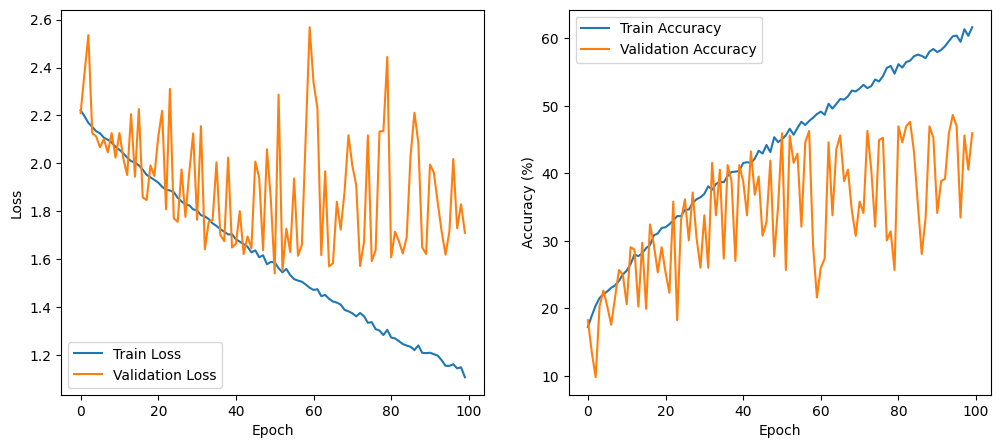

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

plt.plot(train_losses, label='Train Loss')

plt.plot(val_losses, label='Validation Loss')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.legend()

plt.subplot(1, 2, 2)

plt.plot(train_accuracies, label='Train Accuracy')

plt.plot(val_accuracies, label='Validation Accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy (%)')

plt.legend()

plt.show()